# Final Project
### Halina Vercessi-Clarke and Hannah Nguyen

In [4]:
# Imports

In [19]:
import os 
import cv2
import numpy as np
from skimage import io
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)
import matplotlib.pyplot as plt
%matplotlib inline
import math
import pathlib
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from keras.utils import np_utils 

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

from data.data_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [3]:
np.random.seed(0)

In [13]:
file_path = os.getcwd() + '\imagesUPDATED'
data = [] 
labels = []
i = 0
label_names = os.listdir(file_path)
class_names = []

for root, dirs, files in os.walk(file_path):
    path = str(root).replace(str(chr(92)), "/")
    go = False
    if 'fashion' in path:
        go = True
    if (path.split("/")[-1]!='imagesUPDATED') and (go == True):
        class_names.append([label_names[i].split(" ")[0]])
        print(path)
        for img in os.listdir(path):
            #print(img)
            pic = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            thresh = 128
            img_binary = cv2.threshold(pic, thresh, 255, cv2.THRESH_BINARY)[1]
            img = cv2.resize(img_binary,(80,80))
            
            data.append(img)

            labels.append([i])
        i+=1


C:/Users/18025/Documents/GitHub/Fashion-throughout-the-Years/imagesUPDATED/1820 fashion clothing
C:/Users/18025/Documents/GitHub/Fashion-throughout-the-Years/imagesUPDATED/1830 fashion clothing
C:/Users/18025/Documents/GitHub/Fashion-throughout-the-Years/imagesUPDATED/1840 fashion clothing
C:/Users/18025/Documents/GitHub/Fashion-throughout-the-Years/imagesUPDATED/1850 fashion clothing
C:/Users/18025/Documents/GitHub/Fashion-throughout-the-Years/imagesUPDATED/1860 fashion clothing
C:/Users/18025/Documents/GitHub/Fashion-throughout-the-Years/imagesUPDATED/1870 fashion clothing
C:/Users/18025/Documents/GitHub/Fashion-throughout-the-Years/imagesUPDATED/1880 fashion clothing
C:/Users/18025/Documents/GitHub/Fashion-throughout-the-Years/imagesUPDATED/1890 fashion clothing
C:/Users/18025/Documents/GitHub/Fashion-throughout-the-Years/imagesUPDATED/1900 fashion clothing
C:/Users/18025/Documents/GitHub/Fashion-throughout-the-Years/imagesUPDATED/1910 fashion clothing
C:/Users/18025/Documents/GitHu

In [14]:
print("Number of classes: ", len(class_names))

Number of classes:  20


In [15]:
data = np.asarray(data)
labels = np.asarray(labels)

In [16]:
print(data[344].shape)
print(data.shape)

(80, 80)
(956, 80, 80)


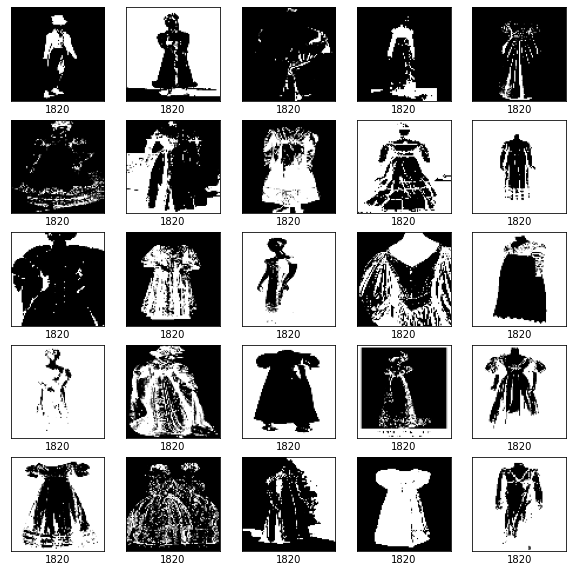

In [34]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[int(labels[i][0])][0])
plt.show()

In [68]:
# Function to split data into train, test, validation sets and normalize image data
def split_data(X, y):
    
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.4, random_state=0)
    xvalid, xtest, yvalid, ytest = train_test_split(xtest, ytest, test_size=0.5, random_state=0)
    
    # Convert numeric indexes to 1-hot vector length 10
    ytrain_1hot = np_utils.to_categorical(ytrain)
    yval_1hot = np_utils.to_categorical(yvalid)
    ytest_1hot = np_utils.to_categorical(ytest)
    
    # Normalize image data
    xtrain = np.asarray(xtrain / 255.0)
    xtest = np.asarray(xtest / 255.0)
    xvalid = np.asarray(xvalid / 255.0)
    
    return xtrain, xvalid, xtest, ytrain_1hot, yval_1hot, ytest_1hot

In [69]:
train_images, val_images, test_images, train_labels1hot, val_labels1hot, test_labels1hot = split_data(data, labels)

In [70]:
train_images.shape

(573, 80, 80)

In [71]:
test_images.shape

(192, 80, 80)

In [72]:
val_images.shape

(191, 80, 80)

In [36]:
model1 = tf.keras.Sequential([
    layers.Conv2D(32, (5, 5), activation='relu', input_shape=(80,80,1)), 
    layers.MaxPooling2D(pool_size=(2, 2)), 
    layers.Conv2D(64, (5, 5), activation='relu'), 
    layers.MaxPooling2D(pool_size=(2, 2)), 
    layers.Flatten(), 
    layers.Dense(500, activation='relu'), 
    layers.Dropout(0.5), 
    layers.Dense(200, activation='relu'), 
    layers.Dropout(0.5), 
    layers.Dense(81, activation='relu'), 
    layers.Dense(20, activation='softmax')
])

model2 = tf.keras.Sequential([
  layers.Conv2D(32, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(80,80,1)),
  layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(144, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
  layers.Dense(20, activation='softmax')
])

In [74]:
model1.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [77]:
model2.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [40]:
print("MODEL 1\n")
print(model1.summary())

MODEL 1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 76, 76, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0         
_________________________________________________________________
dense (Dense)                (None, 500)               9248500   
_________________________________________________________________
dropout (Dropout)            (None, 500)       

In [43]:
print("MODEL 2\n")
print(model2.summary())

MODEL 2

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 78, 78, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 76, 76, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 92416)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 144)               13308048  
_________________________________________________________________
dense_5 (Dense)              (None, 20)                2900      
Total params: 13,329,764
Trainable params: 13,329,764
Non-trainable params: 0
_________________________________

In [75]:
hist_model1 = model1.fit(train_images, train_labels1hot, validation_data=(val_images, val_labels1hot), batch_size=2, epochs=12)

Epoch 1/12
287/287 [==============================] - 35s 122ms/step - loss: 0.2385 - accuracy: 0.9354 - val_loss: 3.4071 - val_accuracy: 0.4817
Epoch 2/12
287/287 [==============================] - 36s 127ms/step - loss: 0.2332 - accuracy: 0.9354 - val_loss: 3.1352 - val_accuracy: 0.4712
Epoch 3/12
287/287 [==============================] - 35s 123ms/step - loss: 0.2217 - accuracy: 0.9372 - val_loss: 3.8284 - val_accuracy: 0.4817
Epoch 4/12
287/287 [==============================] - 33s 115ms/step - loss: 0.1939 - accuracy: 0.9407 - val_loss: 3.2877 - val_accuracy: 0.4555
Epoch 5/12
287/287 [==============================] - 28s 98ms/step - loss: 0.1377 - accuracy: 0.9494 - val_loss: 3.2486 - val_accuracy: 0.4712
Epoch 6/12
287/287 [==============================] - 28s 96ms/step - loss: 0.1931 - accuracy: 0.9407 - val_loss: 3.1888 - val_accuracy: 0.4660
Epoch 7/12
287/287 [==============================] - 28s 97ms/step - loss: 0.1686 - accuracy: 0.9511 - val_loss: 3.0597 - val_accur

In [ ]:
hist_model2 = model2.fit(train_images, train_labels1hot, validation_data=(val_images, val_labels1hot), batch_size=2, epochs=12)

Epoch 1/12
287/287 [==============================] - 82s 284ms/step - loss: 0.4819 - accuracy: 0.9023 - val_loss: 3.2131 - val_accuracy: 0.4817
Epoch 2/12
287/287 [==============================] - 79s 277ms/step - loss: 0.2634 - accuracy: 0.9791 - val_loss: 3.6971 - val_accuracy: 0.4293
Epoch 3/12
287/287 [==============================] - 85s 295ms/step - loss: 0.2522 - accuracy: 0.9895 - val_loss: 3.2878 - val_accuracy: 0.4660
Epoch 4/12
105/287 [=========>....................] - ETA: 52s - loss: 0.1997 - accuracy: 0.9810

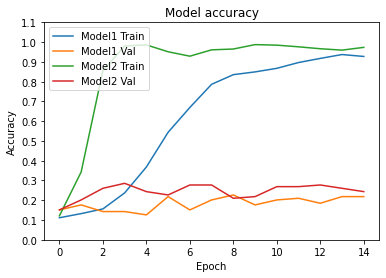

In [47]:
#Visualize the models accuracy
plt.plot(hist_model1.history['accuracy'])
plt.plot(hist_model1.history['val_accuracy'])
plt.plot(hist_model2.history['accuracy'])
plt.plot(hist_model2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.yticks(np.arange(0, 1.2, .1))
plt.legend(['Model1 Train', 'Model1 Val', 'Model2 Train', 'Model2 Val'], loc='upper left')
plt.show()

In [48]:
model1.evaluate(test_images, test_labels1hot, batch_size=1)

120/120 [==============================] - 2s 17ms/step - loss: 3.9588 - accuracy: 0.1917


[3.9587857723236084, 0.19166666269302368]

In [49]:
model2.evaluate(test_images, test_labels1hot, batch_size=1)

120/120 [==============================] - 5s 44ms/step - loss: 6.1873 - accuracy: 0.1250


[6.187267780303955, 0.125]

In [ ]:
# Predictions on unseen images

In [33]:
file_path2 = os.getcwd() + '\prediction_Images2020'
data_2020 = [] 
labels_2020 = []
i = 0
label_names_2020 = os.listdir(file_path2)
classes_2020 = []

for root, dirs, files in os.walk(file_path2):
    path = str(root).replace(str(chr(92)), "/")
    go = False
    if '2020' in path:
        go = True
    if (path.split("/")[-1]!='prediction_Images2020') and (go == True):

        classes_2020.append([label_names_2020[i]])
        for img in os.listdir(path):
            pic = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            thresh = 128
            img_binary = cv2.threshold(pic, thresh, 255, cv2.THRESH_BINARY)[1]
            img = cv2.resize(img_binary,(80,80))
            
            data_2020.append(img/255.0)

            labels_2020.append([i])
        i+=1


In [34]:

data_2020 = np.asarray(data_2020)
data_2020_norm = np.asarray(data_2020/255.0)

labels_2020 = np.asarray(labels)

In [63]:
probability_model1 = tf.keras.Sequential([model1, tf.keras.layers.Softmax()])

predictions_model1 = probability_model1.predict(data_2020_norm)

In [63]:
probability_model2 = tf.keras.Sequential([model2, tf.keras.layers.Softmax()])

predictions_model2 = probability_model2.predict(data_2020_norm)

[0.03224049 0.0323071  0.03218953 0.03229231 0.03242341 0.03247553
 0.03232696 0.03232502 0.03234375 0.03235384 0.03249243 0.03231094
 0.03243182 0.03238389 0.03225708 0.03228007 0.0323449  0.03227178
 0.03213178 0.03214437 0.03219104 0.03205349 0.03214273 0.03221859
 0.03227646 0.03213663 0.03207245 0.03214637 0.03213766 0.03224769
 0.03205001]
10
1920


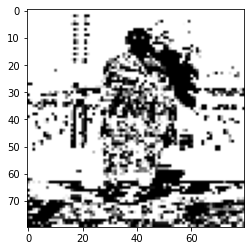

In [64]:
plt.imshow(data_2020_norm[30], cmap=plt.cm.binary)
print(predictions_model1[30])
print(np.argmax(predictions_model1[30]))
print(classes[np.argmax(predictions_model1[30])][0])

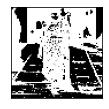

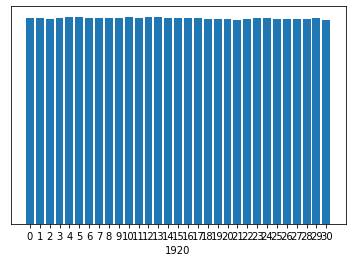

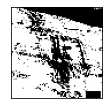

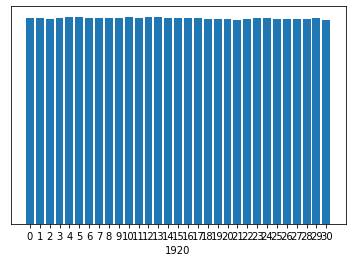

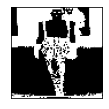

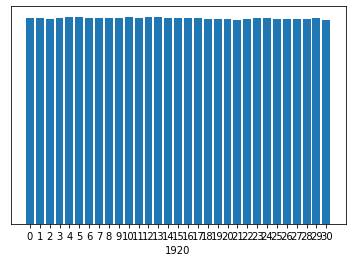

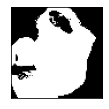

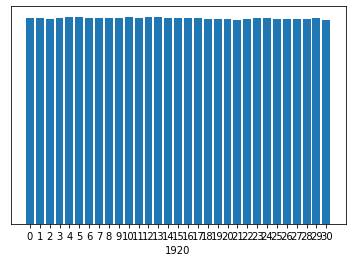

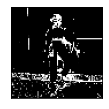

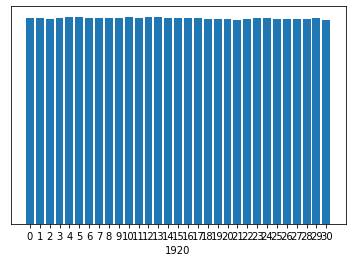

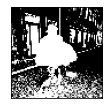

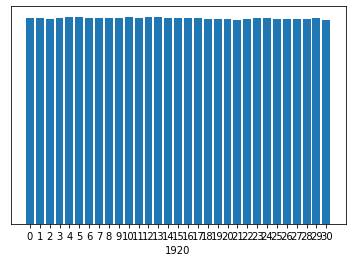

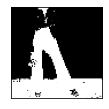

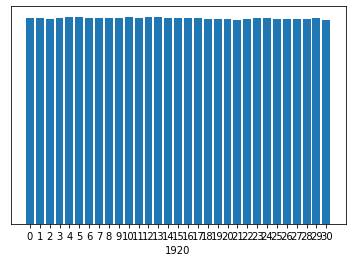

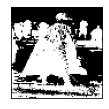

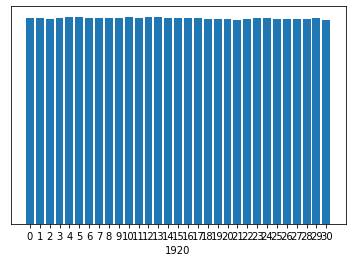

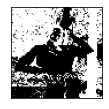

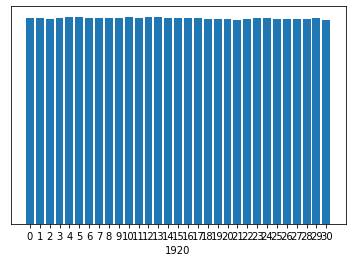

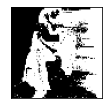

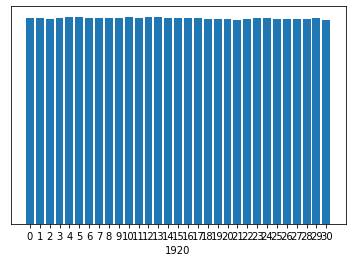

In [72]:
rows = 30
cols = 30

for i in range(15, 25):
    plt.figure(figsize=(4*cols, 2*rows))
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data_2020_norm[i], cmap=plt.cm.binary)
    plt.show()
    plt.bar(range(31), 10*predictions_model1[i])
    plt.xticks(range(31))
    plt.xlabel(classes[np.argmax(predictions_model1[i])][0])
    plt.yticks([])
    
    plt.show()


In [108]:
# PCA Model using SVC

In [ ]:
train_images.flatten()
test_images.flatten()

In [61]:
# Preprocess all images in data array
def vectorize_images(images):
    img_array = []
    for img in images:
        #img = np.asmatrix(img)
        img = img.flatten()/255.0
        img_array.append(img)
    
    return img_array

images_vectorized = vectorize_images(data)

In [62]:
print(images_vectorized)

[array([1., 1., 1., ..., 0., 0., 0.]), array([1.        , 1.        , 1.        , ..., 0.82745098, 0.18823529,
       0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 1., 1., 1.]), array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]), array([0., 0., 0., ..., 1., 1., 1.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]), array([1., 1., 1., ..., 0., 0., 0.]), array([0., 0., 0., ..., 1., 1., 1.]), array([1., 1., 1., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]), array([1., 1., 1., ..., 1., 1., 1.]), array([1., 1., 1., ..., 0., 0., 0.]), array([0., 0., 0., ..., 1., 1., 1.]), array([1., 1., 1., ..., 1., 1., 1.]), array([0., 0., 0., ..., 1., 1., 1.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 

In [63]:
# Find best parameters combination for SVC model using bruteforce method
def SVC_model(X, y):
    svc_model = SVC()
    
    # Test C and gamma parameters to find best combination
    parameter_options = {'C':[1,10,100],'gamma':[0.001,0.005,0.01]}
    clf = GridSearchCV(svc_model, parameter_options, n_jobs=-1, cv=2)
    
    # Search for the best parameters
    clf.fit(X, y)
    #print("Best parameter combination: ", clf.best_params_)
    return clf.best_estimator_

In [64]:
def PCA_Accuracy(X, y):

    # Split data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    # Reduce to 16 components
    pca_model = PCA(n_components = 16)
    pca_model.fit(X_train)
    reduced_X_train = pca_model.transform(X_train)
    reduced_X_test = pca_model.transform(X_test)
    
    svc_model = SVC_model(reduced_X_train, y_train)
    pred = svc_model.predict(reduced_X_test)
    
    return np.asarray([svc_model, accuracy_score(y_test, pred)])

In [65]:
labels_1hot = np_utils.to_categorical(labels)
print(labels_1hot[1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


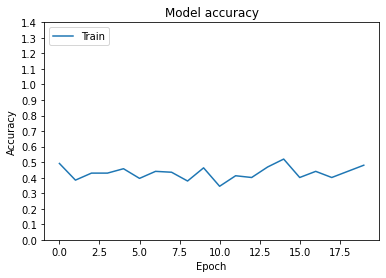

In [69]:
labels_1D = labels.flatten()

scores = []
for i in range(20):
    accuracy_score_images = PCA_Accuracy(images_vectorized, labels_1D)
    scores.append(accuracy_score_images[1])
plt.plot(scores)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.yticks(np.arange(0, 1.5, .1))
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()
